In [2]:
import os
import dill
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline


In [3]:
df1 = pd.read_csv("../../select_BL/selected.csv")
df2 = pd.read_csv('summary.csv')

In [4]:
# Set the path to the BondLengths directory
bond_lengths_path = os.path.abspath("../")

# Regex pattern to match folders in the format "completed_BL_\d+p\d+"
pattern = re.compile(r"^completed_BL_\d+p\d+$")

# Initialize a list to store results
fun_values = []

# Iterate through all items in the BondLengths directory
for item in sorted(os.listdir(bond_lengths_path)):
    # Check if the item matches the pattern and is a directory
    if pattern.match(item) and os.path.isdir(os.path.join(bond_lengths_path, item)):
        folder_path = os.path.join(bond_lengths_path, item, "vqe_result.pkl")
        
        # Read the .pkl file and extract res['fun']
        try:
            with open(folder_path, "rb") as file:
                res = dill.load(file)
                fun_values.append(res['fun'])
        except Exception as e:
            print(f"Error reading {folder_path}: {e}")

# Create a DataFrame from the collected fun values
df3 = pd.DataFrame(fun_values, columns=['optim_fun'])

In [5]:
# Concatenate the columns from the second DataFrame to the first DataFrame
df = pd.concat([df1, df2, df3], axis=1)
df

,BL,Completed,Naive (est),Naive (err_bound),IAE without Bayesian (est),IAE without Bayesian (err_bound),IAE with Bayesian (est),IAE with Bayesian (err_bound),Naive_fixed_shots (est),Naive_fixed_shots (err_bound),Naive (total_sc),IAE without Bayesian (total_sc),IAE with Bayesian (total_sc),optim_fun
0,0.8000,0,-4.702582,0.014974,-4.701646,0.013486,-4.701789,0.013076,-4.676392,0.118459,213105700.0,1658232.00,1490232.05,-4.702494
1,0.8800,0,-4.597694,0.014465,-4.598110,0.012797,-4.598118,0.012216,-4.572288,0.106430,212587150.0,1681086.30,1499266.05,-4.598587
2,1.0000,1,-4.417875,0.014447,-4.417544,0.012707,-4.417851,0.012280,-4.393735,0.110255,213021900.0,1697115.60,1521243.70,-4.418206
3,1.3264,0,-3.944243,0.014040,-3.943494,0.012127,-3.943698,0.011705,-3.921574,0.120342,214361100.0,1666705.25,1488536.50,-3.950053
4,1.4000,1,-3.848574,0.013793,-3.847898,0.012102,-3.848145,0.011821,-3.824418,0.117763,213680150.0,1639840.65,1473144.55,-3.848794
5,1.8000,1,-3.381127,0.013387,-3.380897,0.011570,-3.380629,0.011256,-3.359027,0.130292,217748900.0,1652434.35,1480764.00,-3.381564
6,2.2000,1,-3.036561,0.013016,-3.035935,0.011084,-3.036417,0.010628,-3.017838,0.140290,225493150.0,1674584.45,1503084.45,-3.037013
7,2.6000,1,-2.816762,0.012693,-2.816288,0.010834,-2.816057,0.010434,-2.800942,0.148035,232954750.0,1672130.35,1490437.80,-2.816958
8,3.0000,1,-2.687517,0.012215,-2.687391,0.010430,-2.687930,0.010126,-2.672493,0.142952,233569100.0,1665869.05,1489296.90,-2.687784
9,3.5000,0,-2.573579,0.010747,-2.573004,0.009178,-2.573531,0.008923,-2.561506,0.118393,233382300.0,1688013.15,1509265.35,-2.573682


In [6]:
# Compute the improvement percentages
improvement_percentages = [(val2 - val3) / val2 * 100 for val2, val3 in zip(df['IAE without Bayesian (total_sc)'], df['IAE with Bayesian (total_sc)'])]

C:\Users\qilin\AppData\Local\Temp\ipykernel_38700\3062109504.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


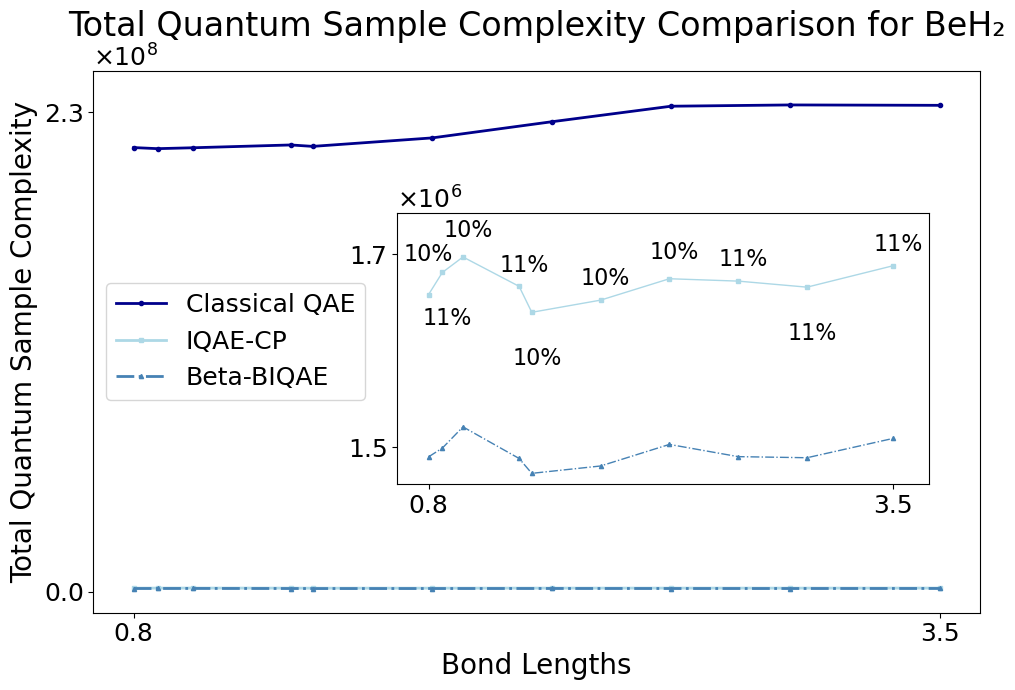

In [7]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Create the main plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the curves
ax.plot(df['BL'], df['Naive (total_sc)'], label='Classical QAE', marker='o', color='#00008b', linewidth=2, markersize=3)
ax.plot(df['BL'], df['IAE without Bayesian (total_sc)'], label='IQAE-CP', marker='s', color='#add8e6', linewidth=2, markersize=3)
ax.plot(df['BL'], df['IAE with Bayesian (total_sc)'], label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=2, markersize=3)

# Labels and title
ax.set_xlabel('Bond Lengths', fontsize=20)
ax.set_ylabel('Total Quantum Sample Complexity', fontsize=20)
ax.set_title('Total Quantum Sample Complexity Comparison for BeH₂', fontsize=24)
ax.legend(loc='center left', fontsize=18)

# Main ticks
ax.set_xticks([df['BL'].iloc[0], np.float64(3.5)])
ax.set_yticks([0.0, 2.3e8])
ax.set_ylim(top=2.5*10**8)
ax.tick_params(axis='both', labelsize=18)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.offsetText.set_fontsize(18)

# Inset plot
ax_inset = inset_axes(ax, width="100%", height="100%", loc="upper right",
                      bbox_to_anchor=(0.35, 0.25, 0.6, 0.5), bbox_transform=ax.transAxes)

# Inset curves
ax_inset.plot(df['BL'], df['IAE without Bayesian (total_sc)'], label='IQAE-CP', marker='s', color='#add8e6', linewidth=1, markersize=3)
ax_inset.plot(df['BL'], df['IAE with Bayesian (total_sc)'], label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=1, markersize=3)

# Inset limits
ax_inset.set_xlim([ax_inset.get_xlim()[0] - 0.05, ax_inset.get_xlim()[1] * 1.02])
ax_inset.set_ylim([ax_inset.get_ylim()[0] - 0.05, ax_inset.get_ylim()[1] * 1.02])

# Inset ticks and fonts
ax_inset.set_yticks([1.5e6, 1.7e6])
# ax_inset.set_xticks(np.arange(0.8, 4, 3))

# ax_inset.set_xticklabels([])
ax_inset.tick_params(axis='both', labelsize=18)
ax_inset.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_inset.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax_inset.yaxis.offsetText.set_fontsize(18)
ax_inset.set_xticks([np.float64(0.8), np.float64(3.5)])
ax_inset.set_xticklabels([np.float64(0.8), np.float64(3.5)])  # Hide x-tick labels

# Move y-axis of inset to the left
ax_inset.yaxis.tick_left()
ax_inset.yaxis.set_label_position("left")

# Annotate percentage improvement
x_offsets = [-0.00, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
y_offsets = [3e4, -6e4, 1.5e4, 1e4, -6e4, 1e4, 1.5e4, 1e4, -6e4, 1e4]

for i, (x, y, improvement) in enumerate(zip(df['BL'], df['IAE without Bayesian (total_sc)'], improvement_percentages)):
    ax_inset.text(x + x_offsets[i], y + y_offsets[i], f"{improvement:.0f}%",
                  ha='center', va='bottom', fontsize=16)

# Save and display
plt.tight_layout()
plt.savefig('total_sc.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


### 2 Plot the Estimated Curves

In [8]:
# Loading the CSV file
df_curve = pd.read_csv('../../exact_curve/exact_curve.csv')

# Calculating the Total Energy
df_curve['TE'] = df_curve['NRE'] + df_curve['EE']

In [9]:
# Perform exact matching
df_merged = df.merge(df_curve[['BL', 'NRE']], on='BL', how='left')

# Check which rows have missing NRE values and need interpolation
mask = df_merged['NRE'].isna()

# Prepare for interpolation
# Extract BL and NRE from df_curve
x = df_curve['BL']
y = df_curve['NRE']

# Interpolate the missing NRE values for BL in df
interpolated_nre = np.interp(df_merged.loc[mask, 'BL'], x, y)

# Fill in the interpolated results
df_merged.loc[mask, 'NRE'] = interpolated_nre


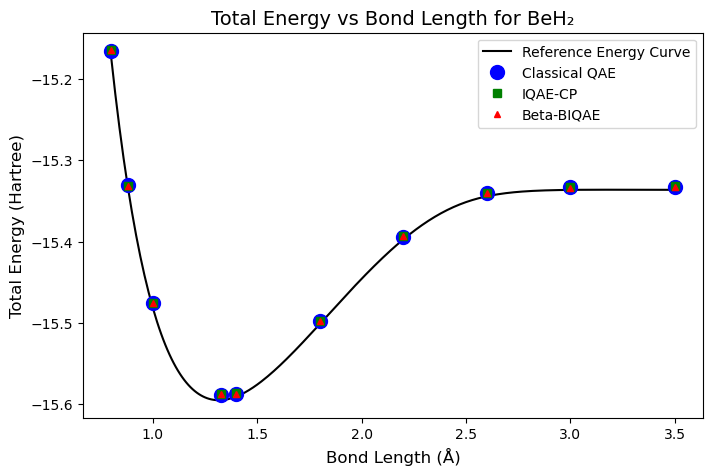

In [10]:
from scipy.interpolate import InterpolatedUnivariateSpline

# For optim res
# spline_optim_res = UnivariateSpline(df_merged['BL'], df_merged['optim_fun'] + df_merged['NRE'], s=0)
spline_optim_res = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['optim_fun'] + df_merged['NRE'], k=4)  # Quartic spline (k=4)

optim_res = spline_optim_res(df_curve['BL'])

# Create a figure with a specified size
plt.figure(figsize=(8, 5))  # Width = 10 inches, height = 6 inches

# Plot the Total Energy curve
plt.plot(df_curve['BL'], df_curve['TE'], label='Reference Energy Curve', color='black')
#plt.plot(df_curve['BL'], optim_res, label='Optimization Result', color='purple', zorder=5, linewidth=0.8)

# Plot the Naive approach, IQAE, and Bayesian IQAE as dots
plt.plot(df_merged['BL'], df_merged['Naive (est)'] + df_merged['NRE'],
         label='Classical QAE', marker='o', color='blue', linestyle='None', markersize=10)

plt.plot(df_merged['BL'], df_merged['IAE without Bayesian (est)'] + df_merged['NRE'],
         label='IQAE-CP', marker='s', color='green', linestyle='None', markersize=6)

plt.plot(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'],
         label='Beta-BIQAE', marker='^', color='red', linestyle='None', markersize=4)

# Add labels and legend
plt.xlabel('Bond Length (Å)', fontsize=12)
plt.ylabel('Total Energy (Hartree)', fontsize=12)
plt.title('Total Energy vs Bond Length for BeH₂', fontsize=14)
plt.legend(fontsize=10)

#plt.ylim(-98.8, -97.8)

# Save the figure
plt.savefig('justify_acc.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### 3 Comparison of Accuracies with Fixed Sample Complexity

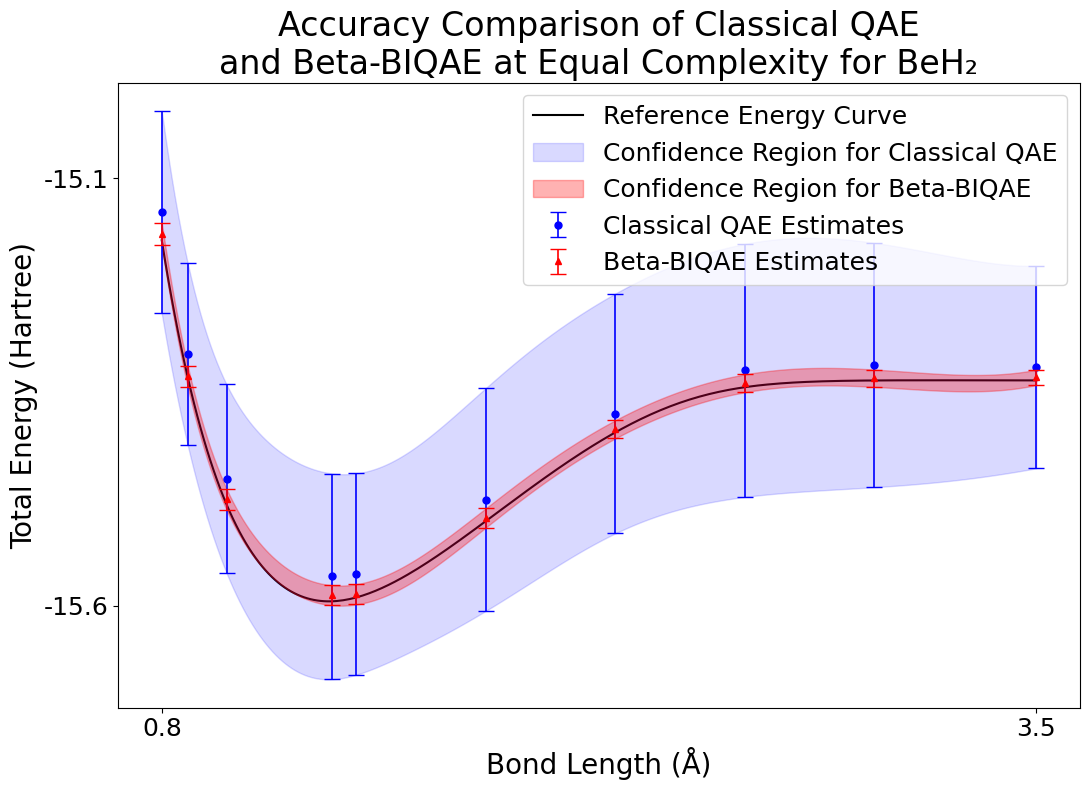

In [11]:
from matplotlib.ticker import FormatStrFormatter
# Create spline functions for the estimates and their error bounds
spline_naive_est = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['Naive_fixed_shots (est)'] + df_merged['NRE'], k=4)
spline_naive_err = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['Naive_fixed_shots (err_bound)'], k=4)
spline_bayes_est = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'], k=4)
spline_bayes_err = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['IAE with Bayesian (err_bound)'], k=4)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(11, 8))  # Slightly larger canvas

# For Naive
naive_est = spline_naive_est(df_curve['BL'])
naive_upper = naive_est + spline_naive_err(df_curve['BL'])
naive_lower = naive_est - spline_naive_err(df_curve['BL'])

# For Bayesian
bayes_est = spline_bayes_est(df_curve['BL'])
bayes_upper = bayes_est + spline_bayes_err(df_curve['BL'])
bayes_lower = bayes_est - spline_bayes_err(df_curve['BL'])

# Plot the reference curve
ax.plot(df_curve['BL'], df_curve['TE'], label='Reference Energy Curve', color='black', zorder=1)

# Confidence regions
ax.fill_between(df_curve['BL'], naive_lower, naive_upper, color='blue', alpha=0.15,
                label='Confidence Region for Classical QAE', zorder=2)
ax.fill_between(df_curve['BL'], bayes_lower, bayes_upper, color='red', alpha=0.30,
                label='Confidence Region for Beta-BIQAE', zorder=3)

# Error bars for estimates
ax.errorbar(df_merged['BL'], df_merged['Naive_fixed_shots (est)'] + df_merged['NRE'],
            yerr=df_merged['Naive_fixed_shots (err_bound)'],
            fmt='o', label='Classical QAE Estimates', color='blue',
            capsize=6, ecolor='blue', elinewidth=1.2, markersize=5, zorder=4)

ax.errorbar(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'],
            yerr=df_merged['IAE with Bayesian (err_bound)'],
            fmt='^', label='Beta-BIQAE Estimates', color='red',
            capsize=6, ecolor='red', elinewidth=1.2, markersize=5, zorder=5)

# Title (split in two lines)
ax.set_title('Accuracy Comparison of Classical QAE\nand Beta-BIQAE at Equal Complexity for BeH₂', fontsize=24)

# Axis labels
ax.set_xlabel('Bond Length (Å)', fontsize=20)
ax.set_ylabel('Total Energy (Hartree)', fontsize=20)

# Ticks — only min and max values
ax.set_xticks([df_curve['BL'].min(), df_curve['BL'].max()])
ax.set_yticks([df_curve['TE'].min(), df_curve['TE'].max()])

ax.set_yticks([-15.6, -15.1])
ax.set_yticklabels([-15.6, -15.1], fontsize=18)

# Format y-axis tick labels to 1 decimal place
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Tick label font sizes
ax.tick_params(axis='both', labelsize=18)

# Legend
ax.legend(loc='upper right', fontsize=18)

# Save and show
plt.tight_layout()
plt.savefig('compare_acc.png', dpi=300, bbox_inches='tight')
plt.show()

### 4 Estimates at the Equilibrium Bond Length

In [12]:
equi_row = df_merged[abs(df_merged['BL'] - 1.3264) < 0.00001]

# Linear interpolation formula
x1, y1 = -1.32, df_curve.loc[abs(df_curve['BL'] - 1.32) < 0.00001, 'TE'].iloc[0]
x2, y2 = -1.33, df_curve.loc[abs(df_curve['BL'] - 1.33) < 0.00001, 'TE'].iloc[0]
numpy_value = y1 + (y2 - y1) * (1.3264 - x1) / (x2 - x1)

print(f"Numpy: {numpy_value:.3f}")
print(f"Minimization: {equi_row['optim_fun'].iloc[0] + equi_row['NRE'].iloc[0]:.3f}")
print(f"Naive approach: ${equi_row['Naive (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \pm {equi_row['Naive (err_bound)'].iloc[0]:.3f}$")
print(f"IAE without Bayesian approach: ${equi_row['IAE without Bayesian (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \pm {equi_row['IAE without Bayesian (err_bound)'].iloc[0]:.3f}$")
print(f"IAE with Bayesian approach: ${equi_row['IAE with Bayesian (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \pm {equi_row['IAE with Bayesian (err_bound)'].iloc[0]:.3f}$")

print("Average multiplicative improvement is: ",sum((naive_upper - naive_lower) / (bayes_upper - bayes_lower)) / len(bayes_lower))

Numpy: -15.627
Minimization: -15.594
Naive approach: $-15.588 \pm 0.014$
IAE without Bayesian approach: $-15.588 \pm 0.012$
IAE with Bayesian approach: $-15.588 \pm 0.012$
Average multiplicative improvement is:  12.159539186161208
